{'gcgft': 'Polyphonic chansons', 'lcmpt': 'singer'}
{'gcgft': 'Alleluias (Chants)', 'lcmpt': 'singer'}
{'gcgft': 'Alleluias (Chants)', 'lcmpt': 'singer'}
{'gcgft': 'Antiphons (Music)', 'lcmpt': 'singer'}
{'gcgft': 'Antiphons (Music)', 'lcmpt': 'singer'}
{'gcgft': 'Antiphons (Music)', 'lcmpt': 'singer'}
{'gcgft': 'Art music', 'lcmpt': 'instrument'}
{'gcgft': 'Art music', 'lcmpt': 'singer'}
{'gcgft': 'Basses danses (Music)', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instruments'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Chamber music', 'lcmpt': 'instrument'}
{'gcgft': 'Hymns', 'lcmpt': 'singer'}
{'gcgft': 'Introits (Music)', 'lcmpt': 'singer'}
{'gcgft': 'I

/Users/vyacheslavtykhonov/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vyacheslavtykhonov/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


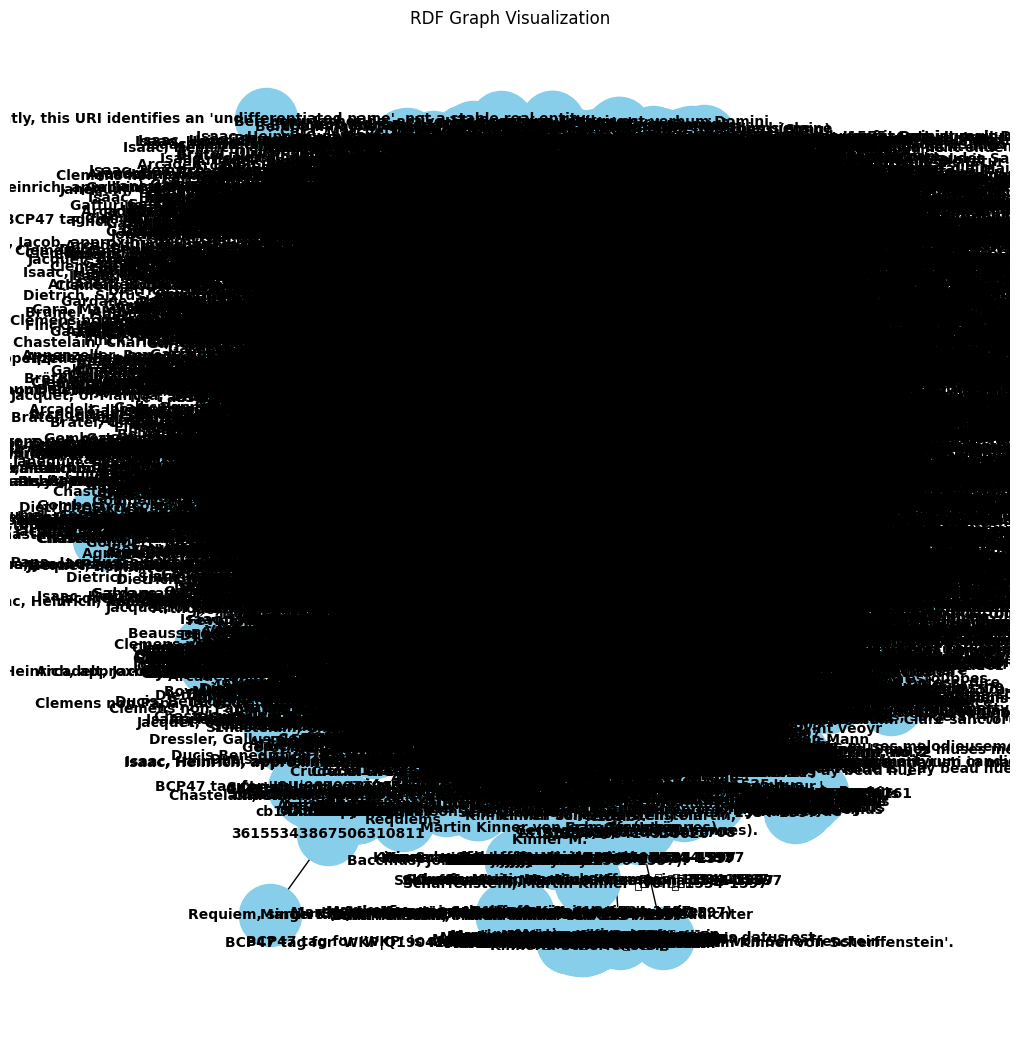

Done


In [153]:
import pandas as pd
import os
import rdflib
#%pip install networkx
import networkx as nx
from rdflib.plugin import register, Serializer, Parser
from rdflib import Graph, URIRef, Namespace, Literal
from rdflib.tools.rdf2dot import rdf2dot
from networkx.readwrite import json_graph
import json
import requests
from io import BytesIO
#%pip install matplotlib
#%pip install scipy
#%pip install mkwikidata 
#%pip install pymarc
from pymarc import MARCReader, Record, Field, parse_xml_to_array
import mkwikidata
import matplotlib.pyplot as plt
THISID = "no2019003435"
#THISID = "no2019133198"
#THISID = None

class DiggingIntoData():
    def __init__(self, THISID=None, debug=False):
        self.diduri = "http://id.loc.gov/authorities/names/"
        self.dcterms = Namespace('http://www.w3.org/2001/XMLSchema#')
        self.thisID = THISID
        self.DEBUG = debug
        self.extra = {}

    def add_extra(self, extra):
        self.extra = extra
        if self.DEBUG:
            print("[DEBUG] %s" % self.extra)
        return

    # Function to read RDF data from XML files in a folder
    def read_rdf_data_from_folder(self, folder_path):
        rdf_data = ""
        #diduri = 'https://dev.uniresolver.io/1.0/identifiers/'
        #diduri = "http://id.loc.gov/authorities/names/"
        graph = rdflib.Graph()
        #dcterms = Namespace('http://www.w3.org/2001/XMLSchema#')
        for filename in os.listdir(folder_path):
            thisfilter = ".xml"
            if self.thisID:
                thisfilter = "%s.xml" % self.thisID
            if filename.endswith(thisfilter):
                if self.DEBUG:
                    print("[DEBUG] %s " % filename)
                thisid = filename.replace('.xml', '')
                nodename = "%s%s" % (self.diduri, thisid)
                staID = URIRef(nodename)
                #extra = self.getenrichment(thisid, exceldata)
                print(filename)
                rdf_data_buffer = ''
                g = rdflib.Graph()
                with open(os.path.join(folder_path, filename), "r") as file:
                    rdf_data_buffer += file.read()
                    if self.DEBUG:
                        print(rdf_data_buffer)
                if rdf_data_buffer:
                    g.parse(data=rdf_data_buffer, format='xml')
                    rdf_data = rdf_data + rdf_data_buffer
                    if thisid in self.extra:
                        if 'gcgft' in self.extra[thisid]:
                            g.add((staID, self.dcterms['issued'], Literal(self.extra[thisid]['gcgft'])))
                            #http://id.loc.gov/authorities/names/no2010058986
                            g.add((staID, self.dcterms['relation'], URIRef('http://viaf.org/viaf/296162268')))
                        if 'lcmpt1' in self.extra[thisid]: 
                            g.add((staID, self.dcterms['issued'], Literal(self.extra[thisid]['lcmpt'])))
                            #http://id.loc.gov/authorities/names/no2010058986
                            g.add((staID, self.dcterms['relation'], URIRef('http://viaf.org/viaf/296162268')))
                    graph = graph + g
                #g.add((staID, skos['hasTopConcept'], URIRef(rootname)))
        return (graph, rdf_data)

    # Function to save RDF data to a file
    def save_rdf_data_to_file(self, rdf_data, filename):
        with open(filename, "w") as file:
            file.write(rdf_data)

    def simpleenrichment(self, data):
        if self.DEBUG:
            print(data[thisid])
        extrafields = {}
        if 'gcgft' in data[thisid]:
            extrafields['gcgft'] = data[thisid]['gcgft'][1]
        if 'lcmpt' in data[thisid]:
            extrafields['lcmpt'] = data[thisid]['lcmpt'][1]
        return extrafields

    # Function to serialize NetworkX graph to JSON-LD format
    def serialize_nx_graph_to_jsonld(self, nx_graph):
        data = json_graph.node_link_data(nx_graph)
        return data

    def getenrichment(self, thisid, data):
        #print(data[thisid])
        extrafields = {}
        if not thisid in data:
            return
        try:
            if 'gcgft' in data[thisid]:
                extrafields['gcgft'] = data[thisid]['gcgft'][1]
            if 'lcmpt' in data[thisid]:
                extrafields['lcmpt'] = data[thisid]['lcmpt'][1]
        except:
            ignore = True
        return extrafields

# Folder containing XML RDF files
folder_path = "/Users/vyacheslavtykhonov/projects/jupyter/notebooks/cmme/rdf"
# Replace 'your_file.xlsx' with the path to your Excel file
file_path = '/Users/vyacheslavtykhonov/projects/jupyter/notebooks/cmme.xlsx'
#dg = DiggingIntoData(THISID='no2019133198', debug=True)
dg = DiggingIntoData(debug=True)
#(g, rdf_data) = dg.read_rdf_data_from_folder(folder_path)

# Load the Excel file
excel_data = pd.read_excel(file_path, sheet_name=1)  # sheet_name=1 specifies the second tab (index 1)

# Display the content of the second tab
ids = excel_data['LCCN 0=NOT SEARCHED']
exceldata = {}
for rowID in excel_data.index:
    thisID = excel_data.loc[rowID]['LCCN 0=NOT SEARCHED']
    gcgft = str(excel_data.loc[rowID]['380 LCGFT']).split('‡')
    if len(gcgft) > 2:
        gcgft[1] = gcgft[1][:-3]
        gcgft[1] = gcgft[1][3:]
    lcmpt = str(excel_data.loc[rowID]['382 LCMPT']).split('‡') #replace('‡2  lcgft','').replace('‡2  lcgft', 'lcmpt')
    if len(lcmpt) > 2:
        lcmpt[1] = lcmpt[1][:-3]
        lcmpt[1] = lcmpt[1][3:]
    metadata = {}
    if str(thisID) != 'nan':
        try:
            metadata['gcgft'] = gcgft[1]
        except:
            ignore = True
        try:
            metadata['lcmpt'] = lcmpt[1]
        except:
            ignore = True
        exceldata[thisID] = metadata
        print(metadata)
    #print(gcgft)
    #print(lcmpt)

# Read RDF data from XML files in the folder
dg.add_extra(exceldata)
(g, rdf_data) = dg.read_rdf_data_from_folder(folder_path)
format = 'n3'
#format = 'pretty-xml'
#print(g.serialize(format=format))
outputfile = "kg"
print(g.serialize(format=format, destination="/Users/vyacheslavtykhonov/projects/jupyter/notebooks/%s.nt" % outputfile))

# Save RDF data to a file
dg.save_rdf_data_to_file(rdf_data, "combined_rdf_data.rdf")

# Parse RDF data
#g = rdflib.Graph()
#g.parse(data=rdf_data, format='xml')

# Create a NetworkX graph from the RDF data
nx_graph = nx.Graph()

for subj, pred, obj in g:
    nx_graph.add_node(subj)
    nx_graph.add_node(obj)
    nx_graph.add_edge(subj, obj, predicate=pred)

# Serialize NetworkX graph to JSON-LD format
jsonld_data = dg.serialize_nx_graph_to_jsonld(nx_graph)

# Save JSON-LD data to a file
with open("graph.jsonld", "w") as json_file:
    json.dump(jsonld_data, json_file, indent=4)

# Visualize the graph (optional)
pos = nx.spring_layout(nx_graph)
labels = {n: n.split('/')[-1] for n in nx_graph.nodes()}
plt.figure(figsize=(10, 10))
nx.draw(nx_graph, pos, labels=labels, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=False)
plt.title("RDF Graph Visualization")
plt.show()
print("Done")

In [154]:

sparql_query2 = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX schema: <http://schema.org/>
SELECT DISTINCT ?entity
WHERE {
  ?entity a foaf:Document.
  ?entity schema:sameAs ?viaf.
  FILTER(STRSTARTS(STR(?viaf), "http://viaf.org/"))
}
"""
sparql_query32 = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX schema: <http://schema.org/>
SELECT DISTINCT ?node ?label
WHERE {
  ?node rdfs:label ?label.
  FILTER(STRSTARTS(str(?node), "http://viaf.org/"))
}
"""

sparql_query2 = """
PREFIX viaf: <http://viaf.org/viaf/>
PREFIX loc: <http://id.loc.gov/authorities/names/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT ?locResource ?property ?viafResource ?label ?topic
WHERE {
  {
    ?viafResource ?property ?locResource .
    FILTER(STRSTARTS(STR(?viafResource), str(viaf:)) && STRSTARTS(STR(?locResource), str(loc:)))
  }
  UNION
  {
    ?locResource ?property ?viafResource .
    FILTER(STRSTARTS(STR(?viafResource), str(viaf:)) && STRSTARTS(STR(?locResource), str(loc:)))
  }
  UNION
  {
  ?viafResource rdfs:label ?label.
  FILTER(STRSTARTS(str(?viafResource), "http://viaf.org/"))
  }
  UNION
  {
  ?locResource xsd:issued ?topic.
  FILTER(STRSTARTS(str(?locResource), "http://id.loc.gov/"))
  }
}
"""
sparql_query3 = """
SELECT DISTINCT ?node ?label ?value
WHERE {
  ?node rdfs:label ?label.
  FILTER(STRSTARTS(str(?node), "http://viaf.org/"))
}
"""
# Execute the SPARQL query and print results
results = g.query(sparql_query2)

print("All Nodes:")
for row in results:
    print(row)
    #print(f"Node: {row['node']}")

All Nodes:
(rdflib.term.URIRef('http://id.loc.gov/authorities/names/no2019050123'), rdflib.term.URIRef('http://schema.org/sameAs'), rdflib.term.URIRef('http://viaf.org/viaf/1643155566479313380000'), None, None)
(rdflib.term.URIRef('http://id.loc.gov/authorities/names/no2020012064'), rdflib.term.URIRef('http://schema.org/sameAs'), rdflib.term.URIRef('http://viaf.org/viaf/587158070770908780000'), None, None)
(rdflib.term.URIRef('http://id.loc.gov/authorities/names/no2019092649'), rdflib.term.URIRef('http://schema.org/sameAs'), rdflib.term.URIRef('http://viaf.org/viaf/4000156223655605400004'), None, None)
(rdflib.term.URIRef('http://id.loc.gov/authorities/names/no2019042336'), rdflib.term.URIRef('http://schema.org/sameAs'), rdflib.term.URIRef('http://viaf.org/viaf/50155343964306312559'), None, None)
(rdflib.term.URIRef('http://id.loc.gov/authorities/names/no2020074117'), rdflib.term.URIRef('http://schema.org/sameAs'), rdflib.term.URIRef('http://viaf.org/viaf/3462159337536013150002'), None

In [156]:
def getpairs(d, DEBUG=False):
    resultpairs = []
    known = {}
    for idx in range(0, len(d)):
        if DEBUG:
            print(d[idx])
        for intindex in range(0, len(d)):
            pairs = {}
            if not d[idx]==d[intindex]:
                if DEBUG:
                    print("\t%s" % d[intindex])
                pairstring1 = "%s%s" % (d[idx], d[intindex])
                pairstring2 = "%s%s" % (d[intindex], d[idx])
                if not pairstring1 in known:
                    if not pairstring2 in known:
                        pairs[d[idx]] = d[intindex]
                        known[pairstring1] = 1
                        known[pairstring2] = 1
            if pairs:
                resultpairs.append(pairs)
    return resultpairs

columns = ["locResource", "property", "viafResource", "label", "topic"]
nodes = {}
links = {}
viaf = {}
points = []
topics = {}
LIMIT = 3000000
counter = 0
for row in results:
    if counter < LIMIT:
        counter = counter + 1
        datapoint = {}
        for ix in range(0,len(row)):
            if row[ix]:
                datapoint[columns[ix]] = str(row[ix])
        if 'locResource' in datapoint:
            datapoint['id'] = datapoint['locResource'].replace('http://id.loc.gov/authorities/names/no', '')
        if 'label' in datapoint:
            viaf[datapoint['viafResource']] = datapoint['label']
        if 'topic' in datapoint:
            topics[datapoint['locResource']] = datapoint['topic']
            if datapoint['topic'] in links:
                ids = links[datapoint['topic']]
                ids.append(datapoint['id'])
            else:
                ids = [datapoint['id']]
                links[datapoint['topic']] = ids
            #print(datapoint)
        points.append(datapoint)
    #print(datapoint)
    #print(f"Node: {row['node']}")
enrichedpoints = []
knownpoints = {}
for item in points:
    if 'viafResource' in item:
        #print(item['viafResource'])
        if item['viafResource'] in viaf:
            #print(viaf[item['viafResource']])
            item['description'] = viaf[item['viafResource']]
            item['user'] = viaf[item['viafResource']]
        if 'locResource' in item:
            #print(item['locResource'])
            if item['locResource'] in topics:
                item['topic'] = topics[item['locResource']]
                item['description'] = topics[item['locResource']]
    if 'description' in item:
        if 'id' in item:
            if not item['id'] in knownpoints:
                if 'user' in item:
                    #del item['description']
                    if 'topic' in item:
                        del item['topic']
                    item['link'] = item['viafResource']
                    del item['locResource']
                    del item['property']
                    del item['viafResource']
                    enrichedpoints.append(item) 
                    knownpoints[item['id']] = 1
enrichedpoints
#points
data = {}
data['nodes'] = enrichedpoints
#data['links'] = links
totallinks = []
for topic in links:
    pairs = getpairs(links[topic])
    pairpoint = {}
    for pair in pairs:
        pairpoint = {}
        #print(list(pair.keys())[0])
        pairpoint['source'] = list(pair.keys())[0]
        pairpoint['target'] = list(pair.values())[0]
        if pairpoint['source'] in knownpoints:
            if pairpoint['target'] in knownpoints:
                totallinks.append(pairpoint)
data['links'] = totallinks#[0:100]
data
import json
with open('/tmp/cmme.json', 'w') as fp:
    json.dump(data, fp)